## To Do

* Posterior predictive sampling
    * Univariate families **DONE**
    * Multivariate families
* Model string representation
* Model aliases

In [1]:
import bambi as bmb

In [2]:
#%load_ext autoreload
#%autoreload 2

In [3]:
data = bmb.load_data("my_data")

In [4]:
formula = bmb.Formula("y ~ x")
model = bmb.Model(formula, data)
model.build()

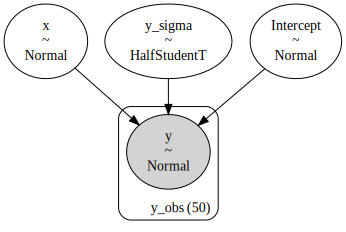

In [6]:
model.graph()

In [5]:
idata = model.fit()
model.predict(idata)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [y_sigma, Intercept, x]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


In [10]:
set(idata.posterior.data_vars)

{'Intercept', 'x', 'y_mean', 'y_sigma'}

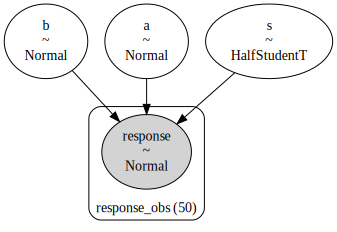

In [14]:
model.set_alias({"Intercept": "a", "x": "b", "sigma": "s", "y": "response"})
model.build()
model.graph()

In [15]:
idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [s, a, b]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


In [16]:
idata.posterior

<xarray.Dataset>
Dimensions:  (chain: 2, draw: 1000)
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    a        (chain, draw) float64 0.16 0.16 0.1736 ... -0.05395 -0.07957
    b        (chain, draw) float64 0.1292 0.1292 -0.08336 ... 0.1496 0.1542
    s        (chain, draw) float64 1.059 1.059 0.9869 ... 1.171 1.171 0.8677
Attributes:
    created_at:                  2022-12-06T19:39:50.118802
    arviz_version:               0.14.0
    inference_library:           pymc
    inference_library_version:   4.1.7
    sampling_time:               2.7000255584716797
    tuning_steps:                1000
    modeling_interface:          bambi
    modeling_interface_version:  0.9.1

In [17]:
model.predict(idata)

In [20]:
idata.posterior

<xarray.Dataset>
Dimensions:        (chain: 2, draw: 1000, response_obs: 50)
Coordinates:
  * chain          (chain) int64 0 1
  * draw           (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * response_obs   (response_obs) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
Data variables:
    a              (chain, draw) float64 0.16 0.16 0.1736 ... -0.05395 -0.07957
    b              (chain, draw) float64 0.1292 0.1292 ... 0.1496 0.1542
    s              (chain, draw) float64 1.059 1.059 0.9869 ... 1.171 0.8677
    response_mean  (chain, draw, response_obs) float64 0.2182 ... -0.1668
Attributes:
    created_at:                  2022-12-06T19:39:50.118802
    arviz_version:               0.14.0
    inference_library:           pymc
    inference_library_version:   4.1.7
    sampling_time:               2.7000255584716797
    tuning_steps:                1000
    modeling_interface:          bambi
    modeling_interface_version:  0.9.1

In [21]:
assert list(idata.posterior.coords) == ["chain", "draw", "response_obs"]
assert set(idata.posterior.data_vars) == {'a', 'b', 'response_mean', 's'}
assert list(idata.posterior["response_mean"].coords) == ["chain", "draw", "response_obs"]

In [22]:
formula = bmb.Formula("y ~ x", "sigma ~ x")
model = bmb.Model(formula, data)
model.build()

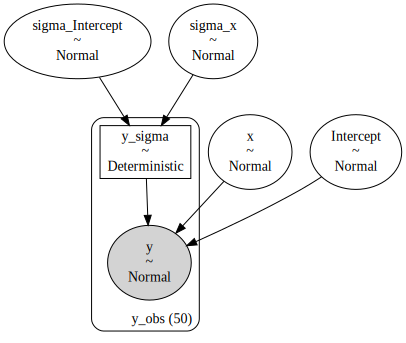

In [23]:
model.graph()

In [24]:
idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Intercept, x, sigma_Intercept, sigma_x]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


In [25]:
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [26]:
model.predict(idata)
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [27]:
idata.posterior

<xarray.Dataset>
Dimensions:          (chain: 2, draw: 1000, y_obs: 50)
Coordinates:
  * chain            (chain) int64 0 1
  * draw             (draw) int64 0 1 2 3 4 5 6 ... 993 994 995 996 997 998 999
  * y_obs            (y_obs) int64 0 1 2 3 4 5 6 7 8 ... 42 43 44 45 46 47 48 49
Data variables:
    Intercept        (chain, draw) float64 0.5022 0.7497 ... 0.1662 0.2417
    x                (chain, draw) float64 -0.2576 -0.2281 ... 0.2558 -0.03993
    sigma_Intercept  (chain, draw) float64 0.1146 0.02782 ... -0.06654 -0.04875
    sigma_x          (chain, draw) float64 -0.315 -0.1144 ... -0.1188 0.04176
    y_sigma          (chain, draw, y_obs) float64 0.973 1.537 ... 0.9239 0.9302
    y_mean           (chain, draw, y_obs) float64 0.3862 0.7598 ... 0.2643
Attributes:
    created_at:                  2022-12-06T19:41:39.482980
    arviz_version:               0.14.0
    inference_library:           pymc
    inference_library_version:   4.1.7
    sampling_time:               3.2401092052459717
    tuning_steps:                1000
    modeling_interface:          bambi
    modeling_interface_version:  0.9.1

In [28]:
assert list(idata.posterior.coords) == ["chain", "draw", "y_obs"]
assert set(idata.posterior.data_vars) == {'Intercept', 'x', 'sigma_Intercept', 'sigma_x', "y_sigma", "y_mean"}
assert list(idata.posterior["y_mean"].coords) == ["chain", "draw", "y_obs"]
assert list(idata.posterior["y_sigma"].coords) == ["chain", "draw", "y_obs"]

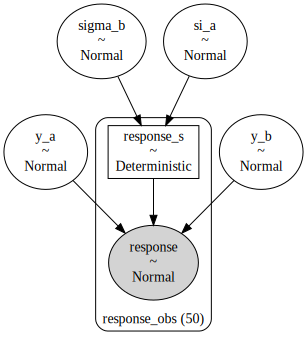

In [33]:
aliases = {
    "y": {"Intercept": "y_a", "x": "y_b", "y": "response"},
    "sigma": {"Intercept": "si_a", "x": "sigma_b", "sigma": "s"}
}
model.set_alias(aliases)
model.build()
model.graph()

In [34]:
idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [y_a, y_b, si_a, sigma_b]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.


In [35]:
model.predict(idata)
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [37]:
assert list(idata.posterior.coords) == ["chain", "draw", "response_obs"]
assert set(idata.posterior.data_vars) == {'y_a', 'y_b', 'si_a', 'sigma_b', "response_s", "response_s", "response_mean"}
assert list(idata.posterior["response_mean"].coords) == ["chain", "draw", "response_obs"]
assert list(idata.posterior["response_s"].coords) == ["chain", "draw", "response_obs"]

In [39]:
data = bmb.load_data("ANES")
data.head()

,vote,age,party_id
0,clinton,56,democrat
1,trump,65,republican
2,clinton,80,democrat
3,trump,38,republican
4,trump,60,republican


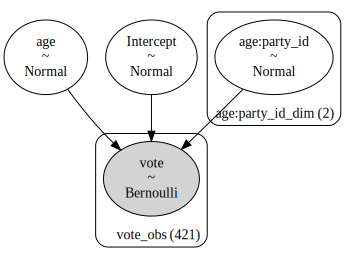

In [40]:
model = bmb.Model("vote[clinton] ~ age + age:party_id", data, family="bernoulli")
model.build()
model.graph()

In [41]:
idata = model.fit()

Modeling the probability that vote==clinton
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Intercept, age, age:party_id]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.


In [43]:
model.predict(idata)
idata.posterior

<xarray.Dataset>
Dimensions:           (chain: 2, draw: 1000, age:party_id_dim: 2, vote_obs: 421)
Coordinates:
  * chain             (chain) int64 0 1
  * draw              (draw) int64 0 1 2 3 4 5 6 ... 993 994 995 996 997 998 999
  * age:party_id_dim  (age:party_id_dim) <U11 'independent' 'republican'
  * vote_obs          (vote_obs) int64 0 1 2 3 4 5 6 ... 415 416 417 418 419 420
Data variables:
    Intercept         (chain, draw) float64 0.7998 0.9854 ... 0.7941 0.5805
    age               (chain, draw) float64 0.0134 0.02232 ... 0.01646 0.0177
    age:party_id      (chain, draw, age:party_id_dim) float64 -0.04851 ... -0...
    vote_mean         (chain, draw, vote_obs) float64 0.8249 0.004772 ... 0.4269
Attributes:
    created_at:                  2022-12-06T19:45:56.502580
    arviz_version:               0.14.0
    inference_library:           pymc
    inference_library_version:   4.1.7
    sampling_time:               4.9268271923065186
    tuning_steps:                1000
    modeling_interface:          bambi
    modeling_interface_version:  0.9.1

In [44]:
assert list(idata.posterior.coords) == ["chain", "draw", "age:party_id_dim", "vote_obs"]
assert set(idata.posterior.data_vars) == {'Intercept', 'age', 'age:party_id', 'vote_mean'}
assert list(idata.posterior["vote_mean"].coords) == ["chain", "draw", "vote_obs"]
assert list(idata.posterior["age:party_id"].coords) == ["chain", "draw", "age:party_id_dim"]
assert set(idata.posterior["age:party_id_dim"].values) == {"independent", "republican"}

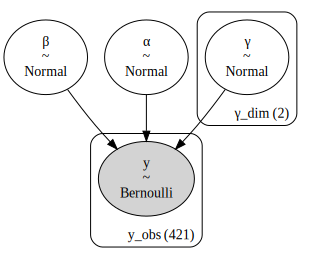

In [49]:
model.set_alias({"age": "β", "Intercept": "α", "age:party_id": "γ", "vote": "y"})
model.build()
model.graph()

In [50]:
idata = model.fit()

Modeling the probability that vote==clinton
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [α, β, γ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.


In [51]:
model.predict(idata)

In [52]:
idata.posterior

<xarray.Dataset>
Dimensions:  (chain: 2, draw: 1000, γ_dim: 2, y_obs: 421)
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * γ_dim    (γ_dim) <U11 'independent' 'republican'
  * y_obs    (y_obs) int64 0 1 2 3 4 5 6 7 8 ... 413 414 415 416 417 418 419 420
Data variables:
    α        (chain, draw) float64 0.4898 0.5667 0.7875 ... 0.9825 0.03204
    β        (chain, draw) float64 0.0269 0.02747 0.01969 ... 0.02223 0.03524
    γ        (chain, draw, γ_dim) float64 -0.04988 -0.1057 ... -0.04991 -0.1042
    y_mean   (chain, draw, y_obs) float64 0.8804 0.009635 ... 0.8032 0.3682
Attributes:
    created_at:                  2022-12-06T19:50:41.685899
    arviz_version:               0.14.0
    inference_library:           pymc
    inference_library_version:   4.1.7
    sampling_time:               6.26057767868042
    tuning_steps:                1000
    modeling_interface:          bambi
    modeling_interface_version:  0.9.1

In [ ]:
assert list(idata.posterior.coords) == ["chain", "draw", "γ_dim", "y_obs"]
assert set(idata.posterior.data_vars) == {'α', 'β', 'γ', 'y_mean'}
assert list(idata.posterior["y_mean"].coords) == ["chain", "draw", "y_obs"]
assert list(idata.posterior["γ"].coords) == ["chain", "draw", "γ_dim"]
assert set(idata.posterior["γ_dim"].values) == {"independent", "republican"}

---

# Documentation notes

## Names

The logic is `{parent}_{child}`. The exception is the linear predictor of the main parameter, which is only `{child}`.

```python
bmb.Formula(
    "y ~ 1 + x + z",
    "sigma ~ 1 + x"
)
```

* `Intercept`
* `x`
* `z`
* `y_sigma`, the sigma parameter in the normal likelihood
* `sigma_Intercept`
* `sigma_x`

### Potential improvements

What about using just `sigma` instead of `{response_name}_sigma`. The gain: cleaner names. The downside: This pattern could be a conflict in a small number of cases where the name of predictors match the name of parameters in the likelihood. It could be "fixed" easily, by double checking the names of the predictors before creating the model.